In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
print('The modules are imported')
%matplotlib inline

The modules are imported


In [2]:
df = pd.read_csv('C:/Users/Samuel/Desktop/data/BigMartSalesData/Train.csv')

In [3]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
df.drop(columns=['Item_Identifier', 'Outlet_Identifier'], inplace=True)

In [6]:
df.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [7]:
df.isnull().sum()

Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [8]:
#To check for the percentage of null values
(df.isnull().sum()/(len(df)))*100

Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

<AxesSubplot:>

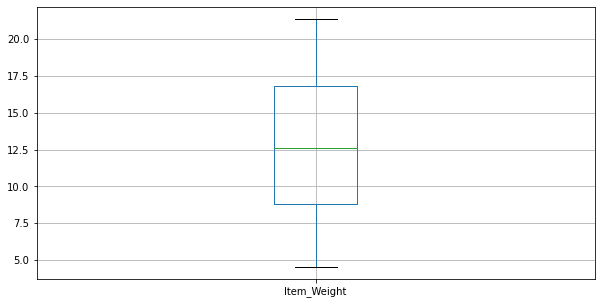

In [9]:
df.boxplot(
    figsize=(10,5), column='Item_Weight'
)

#One use of the boxplot is to check for outliers

In [10]:
df['Item_Weight'].fillna(df.Item_Weight.mean(), inplace=True)

In [11]:
df.Item_Weight.isnull().sum()

0

In [12]:
df['Outlet_Size'].fillna(df.Outlet_Size.mode()[0], inplace=True)
df.Outlet_Size.isnull().sum()

0

In [13]:
pd.set_option('display.float_format', lambda x: '%3.f' % x)

In [14]:
#Outlet Type v/s Sales

outlet_type_sales = df.groupby('Outlet_Type')[['Item_Outlet_Sales']].sum().sort_values('Item_Outlet_Sales')\
    .reset_index()

Text(0.5, 0, 'Sales from Outlet Store Types')

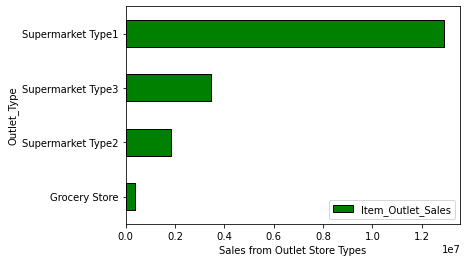

In [15]:
outlet_type_sales.plot(
    kind='barh', color='green', edgecolor='black', y='Item_Outlet_Sales', x='Outlet_Type'
)
plt.xlabel('Sales from Outlet Store Types')

In [16]:
#Outlet Locaation v/s Sales
outlet_loc_sales = df.groupby('Outlet_Location_Type')[['Item_Outlet_Sales']].sum()\
    .sort_values('Item_Outlet_Sales', ascending=False).reset_index()

In [17]:
outlet_loc_sales

,Outlet_Location_Type,Item_Outlet_Sales
0,Tier 3,7636753
1,Tier 2,6472314
2,Tier 1,4482059


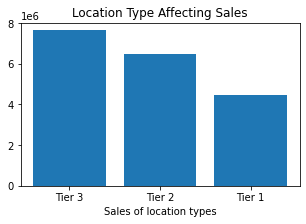

In [18]:
fig, ax = plt.subplots(figsize=(5,3))
plt.bar(data=outlet_loc_sales, x='Outlet_Location_Type', height='Item_Outlet_Sales')
plt.title('Location Type Affecting Sales')
plt.xlabel('Sales of location types')
plt.show()

In [19]:
#Outlet Size v/s Sales
outlet_size_sales = df.groupby('Outlet_Size')[['Item_Outlet_Sales']].sum()\
    .sort_values('Item_Outlet_Sales', ascending=False).reset_index()

<AxesSubplot:xlabel='Outlet_Size'>

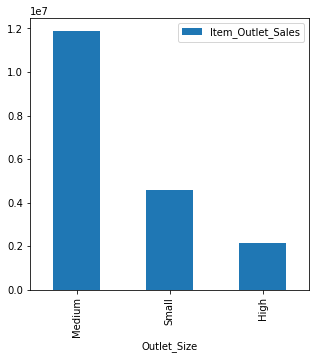

In [20]:
outlet_size_sales.plot(kind='bar', figsize=(5,5), x='Outlet_Size', y='Item_Outlet_Sales')

In [21]:
#Item Type v/s Sales
item_type_sales = df.groupby('Item_Type')[['Item_Outlet_Sales']].max()\
    .sort_values('Item_Outlet_Sales', ascending=False)

<AxesSubplot:xlabel='Item_Type'>

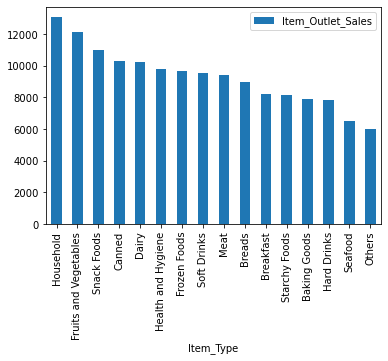

In [22]:
item_type_sales.plot(kind='bar')

In [23]:
#Products performing better and worse in tier 1 cities compared to tier 2 and 3
#We first split our data into two categories tier 1 and tier2&3

df_tier1 = pd.DataFrame(df.loc[df['Outlet_Location_Type']=='Tier 1'])
df_tier2 = pd.DataFrame(df.loc[df['Outlet_Location_Type']=='Tier 2'])
df_tier3 = pd.DataFrame(df.loc[df['Outlet_Location_Type']=='Tier 3'])
df_cities = pd.concat([df_tier2, df_tier3], axis=0) #combines tier2 and 3

In [24]:
df_tier1_list = df_tier1.groupby('Item_Type')[['Item_Outlet_Sales']].max()\
    .sort_values('Item_Outlet_Sales', ascending=False).reset_index()
df_tier1_list.head(2)

In [25]:
df_tier1_list.rename(
    columns={'Item_Type':'Items_Tier1', 'Item_Outlet_Sales':'Sales_Tier1'}, inplace=True
)

In [28]:
df_tier1_list

,Items_Tier1,Sales_Tier1
0,Health and Hygiene,9780
1,Starchy Foods,8132
2,Dairy,7834
3,Canned,7590
4,Fruits and Vegetables,7550
5,Frozen Foods,7370
6,Household,7148
7,Soft Drinks,7018
8,Breads,6972
9,Breakfast,6931


In [29]:
df_cities_list = df_cities.groupby('Item_Type')[['Item_Outlet_Sales']].max()\
    .sort_values('Item_Outlet_Sales', ascending=False).reset_index()

df_cities_list.rename(
    columns={'Item_Type':'Items_Tier2_3', 'Item_Outlet_Sales':'Sales_Tier2_3'}, inplace=True
)

In [30]:
df_cities_list

,Items_Tier2_3,Sales_Tier2_3
0,Household,13087
1,Fruits and Vegetables,12118
2,Snack Foods,10994
3,Canned,10307
4,Dairy,10257
5,Frozen Foods,9678
6,Soft Drinks,9554
7,Meat,9390
8,Breads,8958
9,Breakfast,8209


In [31]:
df_sales = pd.concat([df_tier1_list, df_cities_list], axis=1)

In [32]:
df_sales

,Items_Tier1,Sales_Tier1,Items_Tier2_3,Sales_Tier2_3
0,Health and Hygiene,9780,Household,13087
1,Starchy Foods,8132,Fruits and Vegetables,12118
2,Dairy,7834,Snack Foods,10994
3,Canned,7590,Canned,10307
4,Fruits and Vegetables,7550,Dairy,10257
5,Frozen Foods,7370,Frozen Foods,9678
6,Household,7148,Soft Drinks,9554
7,Soft Drinks,7018,Meat,9390
8,Breads,6972,Breads,8958
9,Breakfast,6931,Breakfast,8209


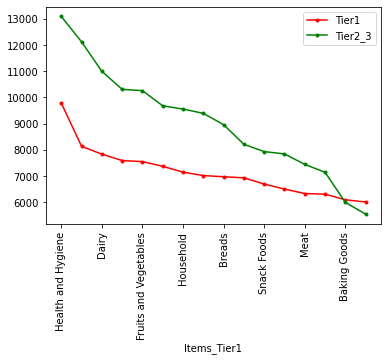

In [33]:
df_sales.plot(x='Items_Tier1', y=['Sales_Tier1', 'Sales_Tier2_3'],
              style=['.-r','.-g'], label=['Tier1', 'Tier2_3'], rot=90)
plt.legend(loc='upper right')

CONCLUSION

1.Sales have been made the most for:
Supermarket Type 1
Tier 3 locations
Medium Sized Outlet
Household Items
2.Tier 2 and Tier 3 cities have outperformed Tier 1 cities
in terms of sales for all items except 'Others'